### Artificial Intelligence Assignment 1 <hr>
Name: Sayyed Mohammed Asif </br> Roll number: 714

In [3]:
import math
from typing import Callable
import matplotlib.pyplot as plt

**Question 1: Implement Perceptron Logic Gates** </br>
Design and implement a perceptron model in Python to simulate
the following logic gates: </br>
● AND </br>
● OR </br>
● NAND </br>
● NOR </br>
<hr>

This cell contains the code for Perceptron Logic Gates Implementation </br>
where we will be implementing and testing the following gates </br>
`AND GATE`, `OR GATE`, `NAND GATE`, `NOR GATE`

In [6]:
def perceptron(weights: list[float], bias: float) -> Callable[[list[int]],int]:
    """ Create a perceptron function with given weights and bias.

    :param weights: List of weights given for inputs.
    :type weights: list[float]
    :param bias: Bias Term
    :type bias: float
    :returns: A function that computes the perceptron output for given inputs
    :rtype: Callable[[list[int],int]
    """
    def perceptron_function(inputs: list[int]) -> int:
        """Computing the output for a given set of inputs.

        :param inputs: List of binary inputs, should contain either 0 or 1
        :type inputs: list[int]
        :return: Binary output (0 or 1) based on weighted sum and bias.
        :rtype: int
        """
        # weighted sum = Σ (weights[i] * input[i]) + bias
        weighted_sum = sum(weight * input_value for weight, input_value in
                           zip(weights, inputs)) + bias
        return 1 if weighted_sum > 0 else 0
    return perceptron_function

# defining the logic gates using defined weights and bias
logic_gates = {
    # outputs 1 when both inputs are 1
    "AND": perceptron(weights=[1,1], bias=-1.5),
    # outputs 1 when either of the input is 1
    "OR": perceptron(weights=[1,1], bias=-0.5),
    # outputs 1 unless both inputs are 1
    'NAND': perceptron(weights=[-1, -1], bias=1.5),
    # outputs 1 with both inputs are 0
    "NOR": perceptron(weights=[-1, -1], bias=0.5)
}

# creating a function to test the logic gates
def test_gates(gate_name: str, gate: Callable[[list[int]],int]) -> None:
    """ Test all the possible outputs of a 2-input perceptron logic gate

    :param gate_name: Name of the gate
    :type gate_name: str
    :param gate: Function representing the logic gate
    :type gate: Callable[[list[int]],int]
    """
    print(f"Testing {gate_name} gate")
    print("Input 1 | Input 2 | Output")
    print("---------------------------")
    for input_1 in [0,1]:
        for input_2 in [0,1]:
            output = gate([input_1, input_2])
            print(f"   {input_1}    |    {input_2}    |   {output}")
    print()

for gate_name, gate in logic_gates.items():
        test_gates(gate_name, gate)

Testing AND gate
Input 1 | Input 2 | Output
---------------------------
   0    |    0    |   0
   0    |    1    |   0
   1    |    0    |   0
   1    |    1    |   1

Testing OR gate
Input 1 | Input 2 | Output
---------------------------
   0    |    0    |   0
   0    |    1    |   1
   1    |    0    |   1
   1    |    1    |   1

Testing NAND gate
Input 1 | Input 2 | Output
---------------------------
   0    |    0    |   1
   0    |    1    |   1
   1    |    0    |   1
   1    |    1    |   0

Testing NOR gate
Input 1 | Input 2 | Output
---------------------------
   0    |    0    |   1
   0    |    1    |   0
   1    |    0    |   0
   1    |    1    |   0



**Question 2: Activation Functions** </br>
● Sigmoid </br>
● ReLU </br>
● Hyperbolic Tangent (tanh)
<hr>

The cell below contains code to implement activation functions without
making use of any mathematical libraries from Python </br>
The goal is to implement the following Activation functions:
1. Sigmoid
2. ReLU
3. TanH

In [8]:
def sigmoid_function(x: float) -> float:
    """Computes the sigmoid activation function"""
    return 1 / (1 + math.exp(-x))

def relu_function(x: float) -> float:
    """Computes the ReLU activation function"""
    return max(0, int(x))

def tanh_function(x: float) -> float:
    """Computes the hyperbolic tangent function"""
    return ((math.exp(x) - math.exp(-x))
              / (math.exp(x) + math.exp(-x)))

Plot the activation functions using a range of input values.

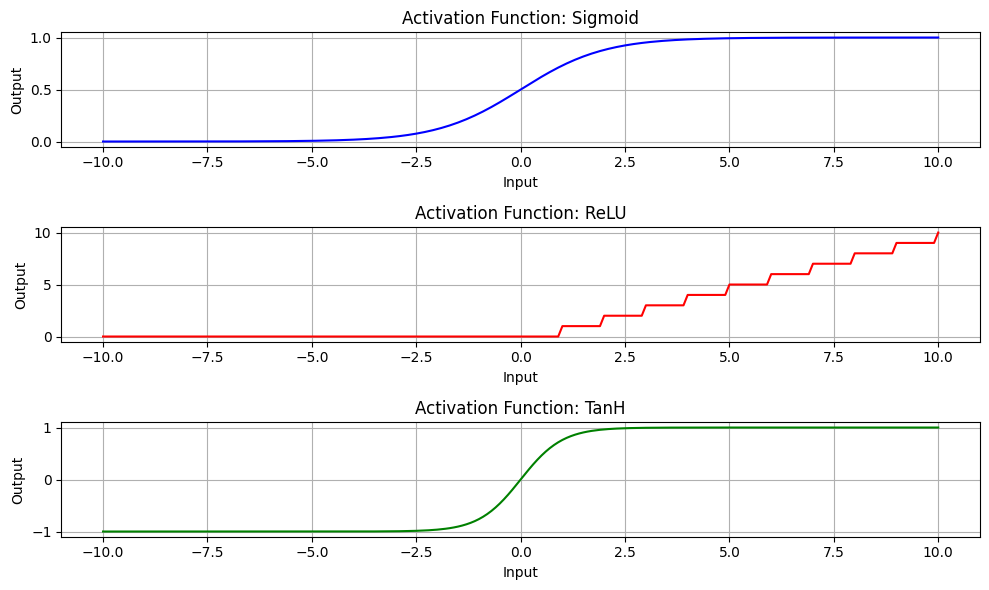

In [9]:
# generating a range of values for plotting
# the 0.1 here indicates the step size
list_of_input_values = [i * 0.1 for i in range(-100, 101)]

# generating values for each activation function
sigmoid = [sigmoid_function(input_value) for input_value in list_of_input_values]
relu = [relu_function(input_value) for input_value in list_of_input_values]
tanh = [tanh_function(input_value) for input_value in list_of_input_values]

# plotting the activation function
plt.figure(figsize=(10,6))

# plotting sigmoid
plt.subplot(3, 1, 1)
plt.plot(list_of_input_values, sigmoid, label="Sigmoid", color="blue")
plt.title("Activation Function: Sigmoid")
plt.xlabel("Input")
plt.ylabel("Output")
plt.grid(True)

# plotting relu
plt.subplot(3, 1, 2)
plt.plot(list_of_input_values, relu, label='Relu', color="red")
plt.title("Activation Function: ReLU")
plt.xlabel("Input")
plt.ylabel("Output")
plt.grid(True)

# plotting tanH
plt.subplot(3, 1, 3)
plt.plot(list_of_input_values, tanh, label='TanH', color="Green")
plt.title("Activation Function: TanH")
plt.xlabel("Input")
plt.ylabel("Output")
plt.grid(True)

# displaying the plot
plt.tight_layout()
plt.show()

**Question 3: Perceptron Training for Logic Gates** </br>
Train a perceptron using the Perceptron Learning Algorithm to classify the
XOR logic gate. </br> 
Clearly define: </br>
● The input dataset </br>
● The weight initialization </br>
● The learning rate and iterations
<hr>
The cell below is for creating a perceptron learning algorithm for XOR gate

Ideally, XOR gate is for linearly inseparable data, which means a single
layer perceptron cannot learn it. so this will most likely not work.

In [10]:
import random

# defining input 1, input 2 and the output
# XOR stands for exclusive OR gate and for the truth table, when both the
# signals are some, the output is 0 and when both the signals are different
# then the value is 1
xor_truth_table = [
    ([0, 0], 0),
    ([0, 1], 1),
    ([1, 0], 1),
    ([1, 1], 1),
]

# initializing the weights and bias randomly
weight_1, weight_2 = random.uniform(-1,1), random.uniform(-1, 1)
bias = random.uniform(-1, 1)

# setting the hyperparameters
learning_rate = 0.1
epochs = 10

# creating a step activation function
def step_function(x: float) -> int:
    """Computes the step function based on input"""
    return 1 if x>= 0 else 0

# training a perceptron
# iterating through the entire code for each epoch
for epoch in range(epochs):
    # keeps track of the error value
    total_error = 0
    # iterating through the table and taking a row of data at a time
    for (inputs, target) in xor_truth_table:
        # unpacking the input variable into input a and b
        input_a, input_b = inputs
        # calculated the weighted sum
        weighted_sum = ((weight_1 * input_a)
                        + (weight_2 * input_b)
                        + bias)
        # passing the weighted sum through the step function
        output = step_function(weighted_sum)

        # calculating the error during this epoch
        epoch_error = target - output
        total_error += abs(epoch_error)

        # updating the bias and weights
        weight_1 += learning_rate * epoch_error * input_a
        weight_2 += learning_rate * epoch_error * input_b
        bias += learning_rate * epoch_error

        print(f"Epoch {epoch + 1}: Total Error = {total_error}")

# Final weights after training
print(f"Final Weights: w1={weight_1}, w2={weight_2}, b={bias}")

Epoch 1: Total Error = 0
Epoch 1: Total Error = 1
Epoch 1: Total Error = 2
Epoch 1: Total Error = 3
Epoch 2: Total Error = 0
Epoch 2: Total Error = 0
Epoch 2: Total Error = 1
Epoch 2: Total Error = 2
Epoch 3: Total Error = 1
Epoch 3: Total Error = 1
Epoch 3: Total Error = 2
Epoch 3: Total Error = 2
Epoch 4: Total Error = 1
Epoch 4: Total Error = 1
Epoch 4: Total Error = 2
Epoch 4: Total Error = 2
Epoch 5: Total Error = 1
Epoch 5: Total Error = 1
Epoch 5: Total Error = 2
Epoch 5: Total Error = 2
Epoch 6: Total Error = 1
Epoch 6: Total Error = 1
Epoch 6: Total Error = 2
Epoch 6: Total Error = 2
Epoch 7: Total Error = 1
Epoch 7: Total Error = 1
Epoch 7: Total Error = 1
Epoch 7: Total Error = 1
Epoch 8: Total Error = 1
Epoch 8: Total Error = 1
Epoch 8: Total Error = 2
Epoch 8: Total Error = 2
Epoch 9: Total Error = 1
Epoch 9: Total Error = 1
Epoch 9: Total Error = 1
Epoch 9: Total Error = 1
Epoch 10: Total Error = 0
Epoch 10: Total Error = 0
Epoch 10: Total Error = 0
Epoch 10: Total Error 

### Question 4: Multi-layer Perceptron (MLP)

### a) Why a Single-Layer Perceptron Cannot Solve XOR

A **single-layer perceptron** is only capable of solving **linearly separable** problems, meaning it can learn to classify data points that can be separated by a single straight line or hyperplane. 

The XOR gate's truth table is:

| \(X_1\) | \(X_2\) | XOR Output |
|--------|--------|------------|
|   0    |   0    |     0      |
|   0    |   1    |     1      |
|   1    |   0    |     1      |
|   1    |   1    |     0      |

The points corresponding to the XOR gate's output cannot be separated by a single line in a 2D plane:

- \( (0, 0) \) → 0
- \( (0, 1) \) → 1
- \( (1, 0) \) → 1
- \( (1, 1) \) → 0

These points are not linearly separable, meaning no straight line can split the points such that all the 1s are on one side and all the 0s are on the other side. Since a single-layer perceptron uses a linear decision boundary, it cannot solve the XOR problem.

---

### b) How an MLP (with a Hidden Layer) Overcomes This Limitation

A **Multi-Layer Perceptron (MLP)** introduces **hidden layers** between the input and output layers, enabling the model to learn non-linear decision boundaries. The addition of hidden layers allows the MLP to create **complex decision surfaces** that can separate non-linearly separable data like XOR.

- **Hidden Layer(s)**: These layers perform transformations on the inputs using weighted sums and activation functions, allowing the network to capture complex patterns and relationships between inputs. By combining features in multiple ways, the network can break down the XOR problem into linearly separable subproblems.
- **Non-linearity**: Activation functions like ReLU or sigmoid add non-linearity, allowing the MLP to create curves or complex boundaries that can separate the XOR outputs.

Thus, with a hidden layer, an MLP can approximate non-linear functions and solve problems like XOR by learning complex, non-linear decision boundaries.